In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
X=data.data
y=data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [6]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [7]:
L.fit(X_train,y_train)

LinearRegression()

In [8]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [9]:
y_pred=L.predict(X_test)

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [11]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

In [12]:
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [13]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [14]:
y_pred1=R.predict(X_test)

In [15]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.00042490200441935855
RMSE 70.25956272917782


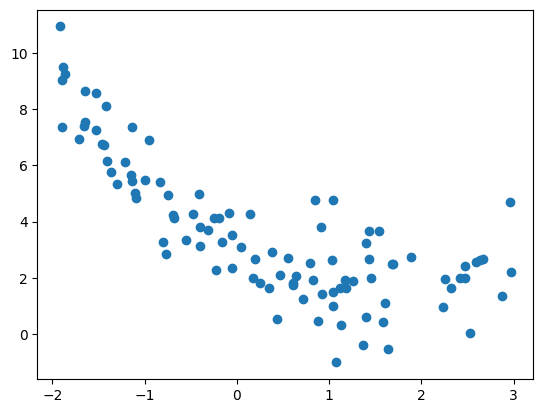

In [16]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

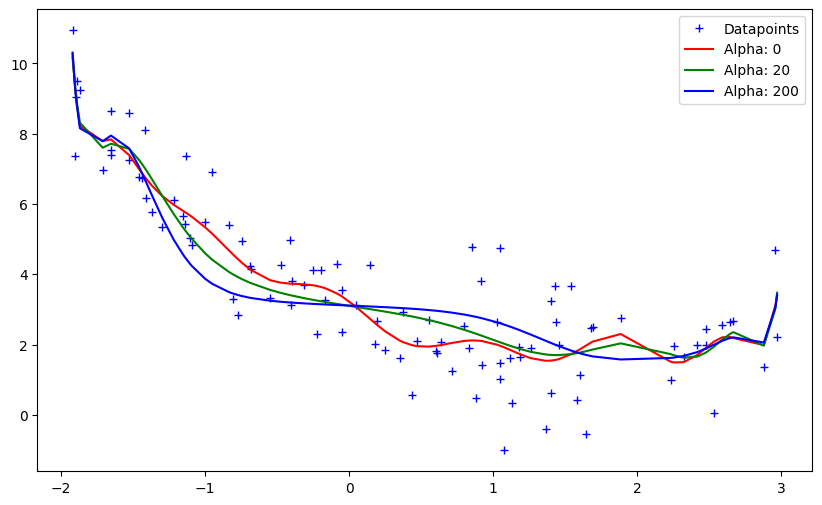

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [18]:

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

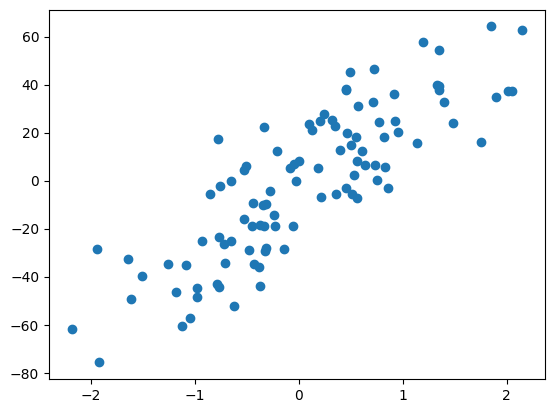

In [19]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [22]:

from sklearn.linear_model import Ridge

In [23]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [24]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


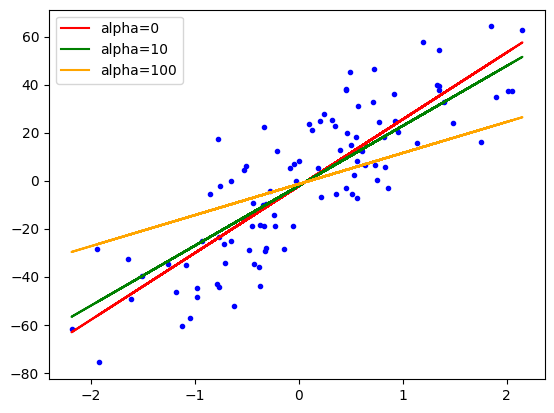

In [25]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

## ridge-regression-from-scratch-m-and-b

In [26]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [29]:
reg = MeraRidge(alpha=10)

In [30]:
reg.fit(X,y)

[24.9546267] [-2.126913]


## ridge- regression for n-D data

In [31]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [32]:
X,y = load_diabetes(return_X_y=True)

In [33]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [34]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1,solver='cholesky')

In [35]:
reg.fit(X_train,y_train)


Ridge(alpha=0.1, solver='cholesky')

In [36]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [37]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [38]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [39]:

reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281


# ridge-regression-gradient-descent

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [5]:
from sklearn.linear_model import SGDRegressor

In [6]:
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [7]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.44650965938978404
[  46.14445694 -161.66120132  368.10573793  269.12215532   -3.99167582
  -58.44199563 -166.0102213   138.74770833  336.93377831   93.63839111]
[147.60914016]


In [8]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')

In [9]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.46250101619914563
[  34.52192544 -290.84084076  482.40181344  368.0678662  -852.44873179
  501.59160336  180.11115788  270.76333979  759.73534372   37.4913546 ]
151.10198517439466


In [10]:
class MeraRidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [11]:
reg = MeraRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [12]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4738018280260913
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713466


# lasso-regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[28.56835449]
-2.8987090818414343


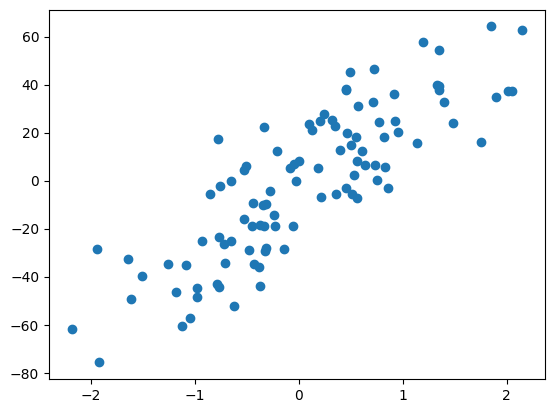

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+04, tolerance: 7.731e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

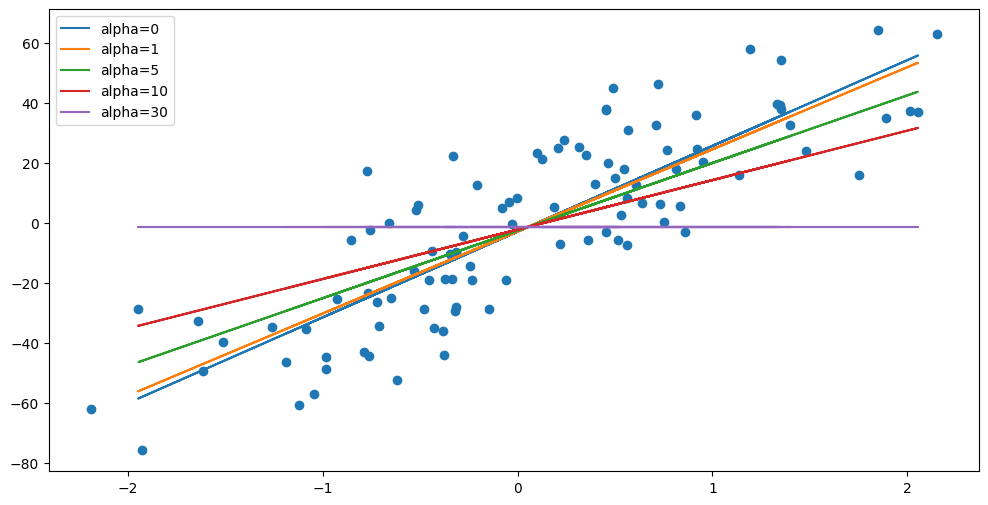

In [3]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

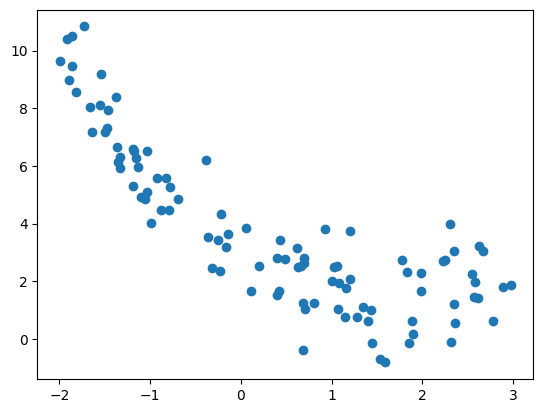

In [4]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.803e+01, tolerance: 7.863e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

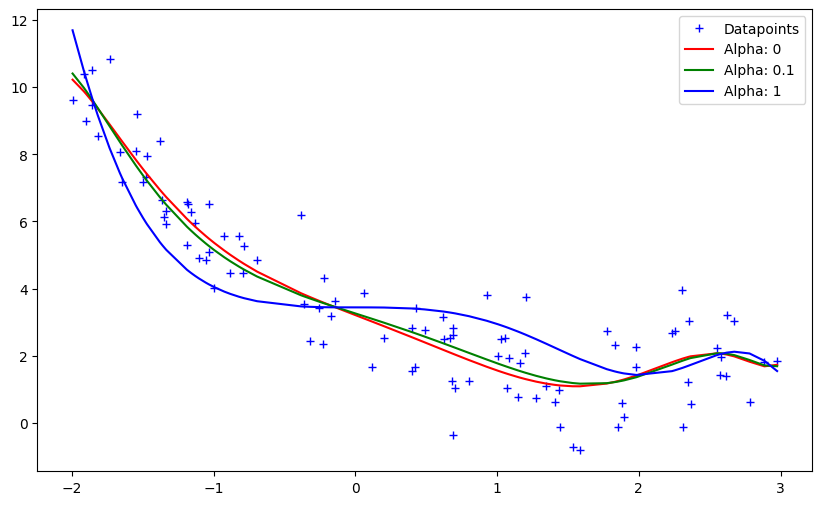

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

# lasso-regression-key-points

## 1. How are coefficients affected?

In [6]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [7]:
data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [8]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [9]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

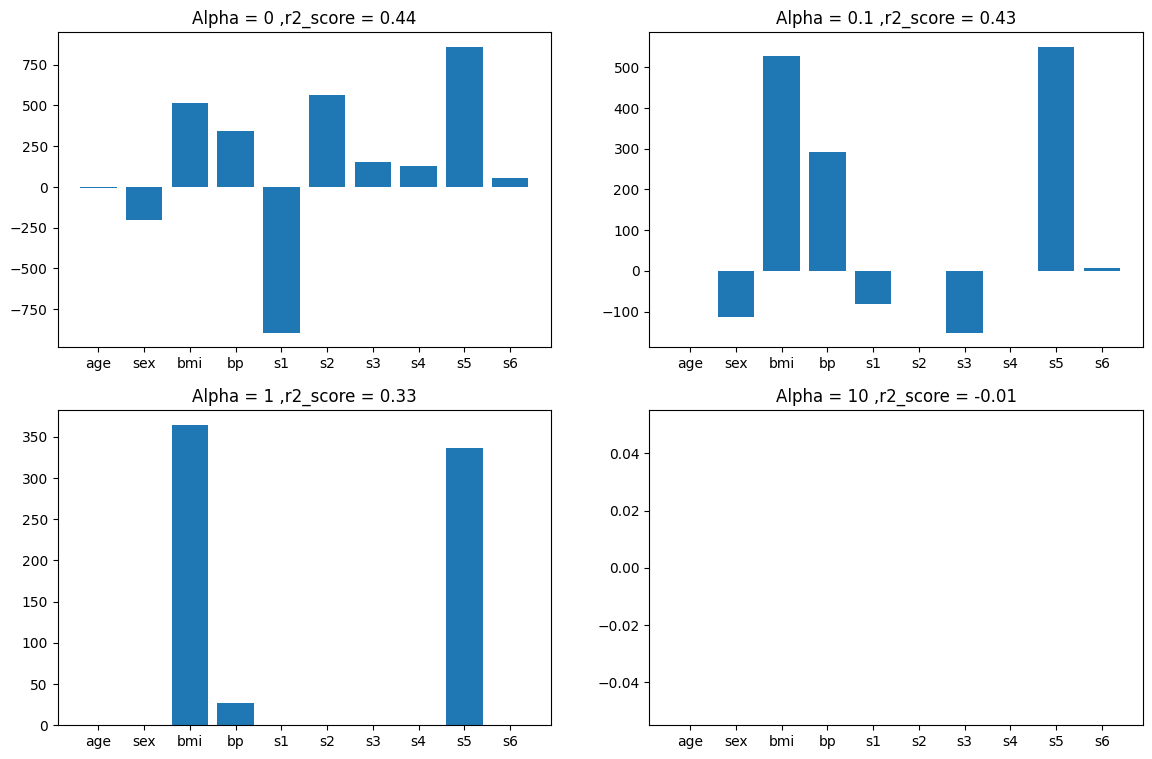

In [10]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

## 2. Higher Coefficients are affected more


In [11]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

In [12]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                  
0.0000     -9.158653 -205.454322  516.693745  340.619999 -895.551989   
0.0001     -9.069064 -205.329406  516.789418  340.532379 -888.660904   
0.0010     -8.262770 -204.205364  517.650073  339.743901 -826.663603   
0.0100     -1.359721 -192.937180  526.356514  332.641101 -430.226975   
0.1000      0.000000 -113.969928  526.744396  292.628472  -82.693681   
1.0000      0.000000    0.000000  363.885742   27.273163    0.000000   
10.0000     0.000000    0.000000    0.000000    0.000000    0.000000   
100.0000    0.000000    0.000000    0.000000    0.000000    0.000000   
1000.0000   0.000000    0.000000    0.000000    0.000000    0.000000   
10000.0000  0.000000    0.000000    0.000000    0.000000    0.000000   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.220669  153.893104  126.731395  861.126997  52.421122  
0.0001      555.958584  150.593655  125.450143  858.645541  52.380294  
0.0010      508.617395  120.908607  113.921773  836.320753  52.012849  
0.0100      191.295480  -44.034913   68.988987  688.396028  47.940616  
0.1000       -0.000000 -152.685338    0.000000  551.080291   7.170992  
1.0000        0.000000   -0.000000    0.000000  336.137262   0.000000  
10.0000       0.000000   -0.000000    0.000000    0.000000   0.000000  
100.0000      0.000000   -0.000000    0.000000    0.000000   0.000000  
1000.0000     0.000000   -0.000000    0.000000    0.000000   0.000000  
10000.0000    0.000000   -0.000000    0.000000    0.000000   0.000000

In [13]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

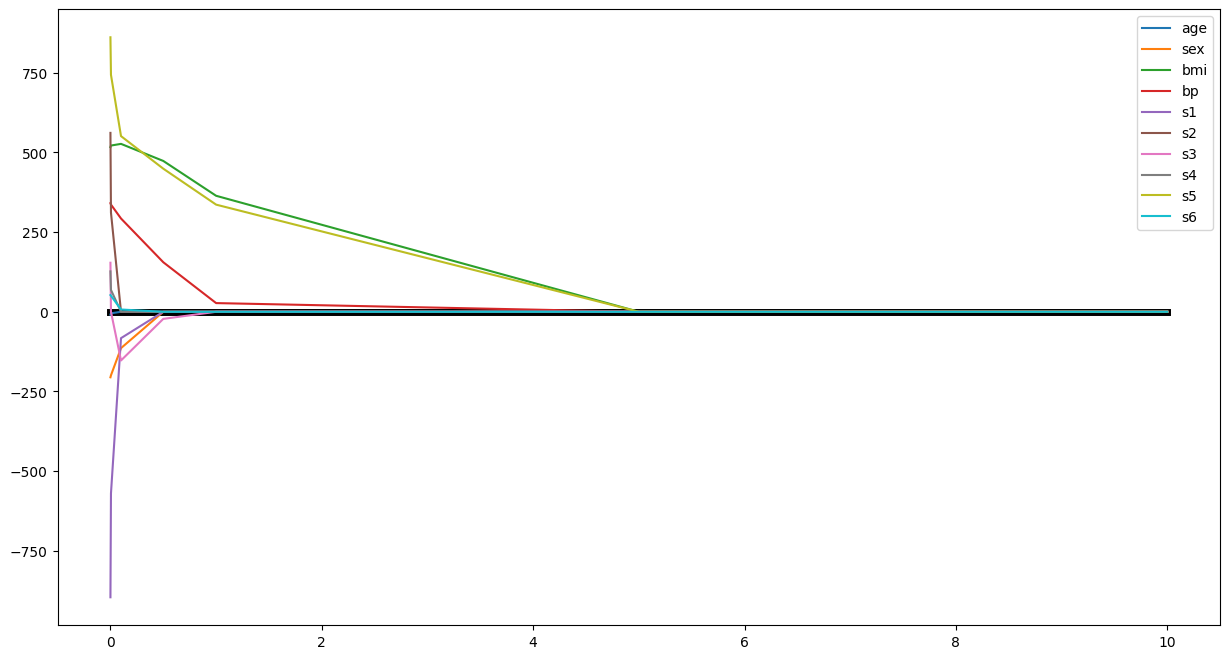

In [14]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

## 3. Impact on Bias and Variance


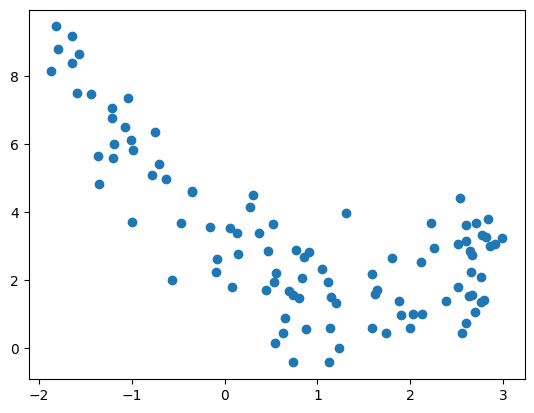

In [15]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)


In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [18]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.643e+01, tolerance: 3.638e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

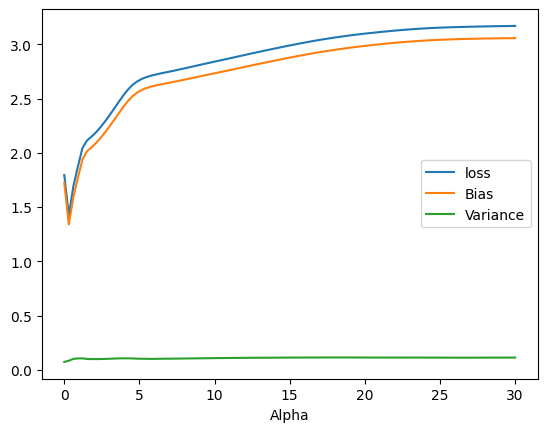

In [19]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.legend()

## 4. Effect of Regularization on Loss Function


[27.82809103]
-2.29474455867698


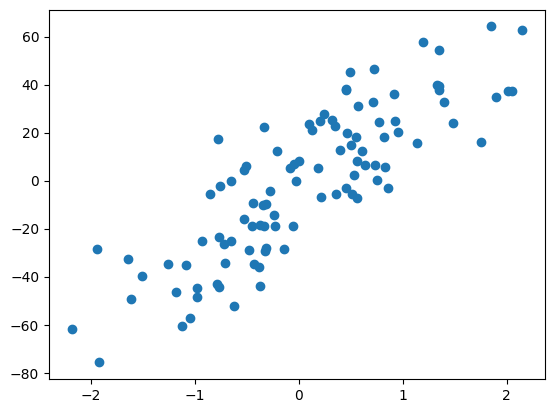

In [20]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [21]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [22]:
def predict(m):
    return m*X - 2.29

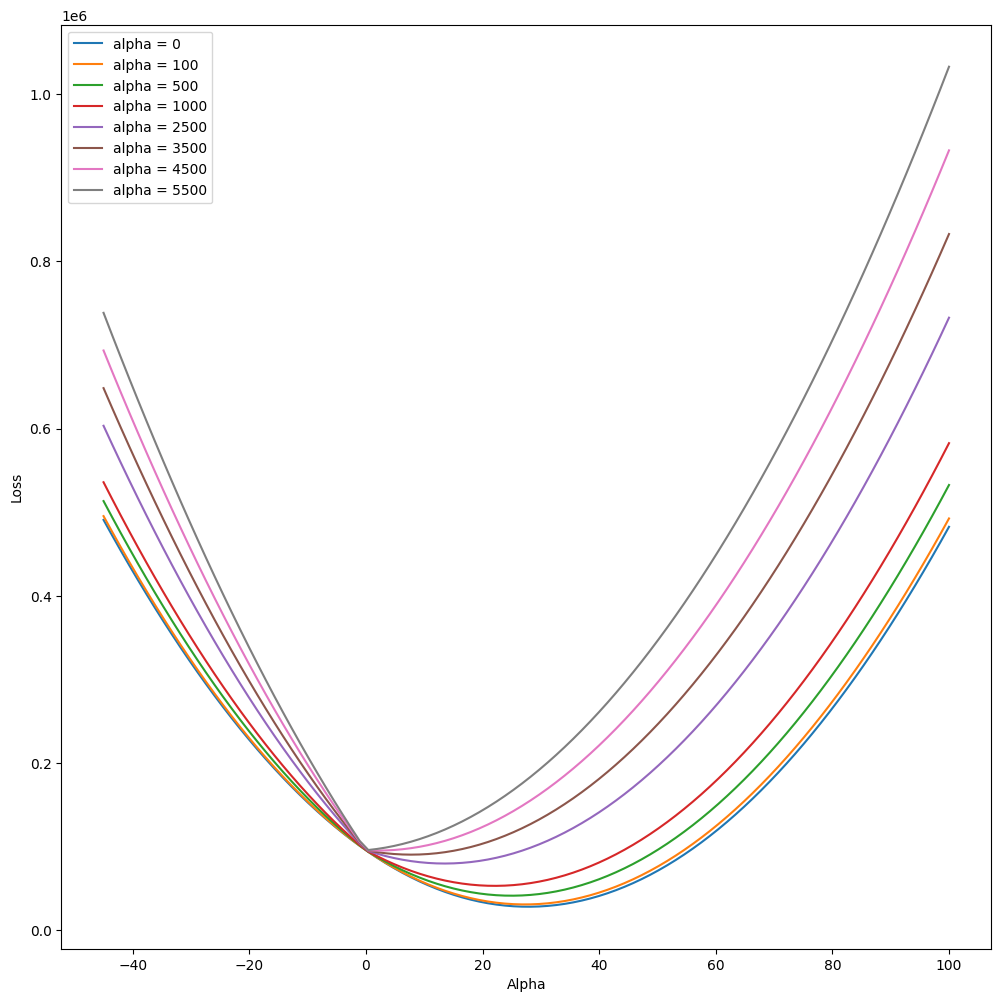

In [23]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

# elastic-net-regression

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [25]:
X,y = load_diabetes(return_X_y=True)

In [26]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [28]:
# Ridge 
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.45199494197195456

In [29]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.44111855963110613

In [30]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4531474541554823